# Description
link/ https://www.propertyfinder.eg/en/search?c=1&fu=0&ob=mr&page=1

### The data comes from the propertyfinder site

Propertyfinder is a Developer of a real estate rental marketplace designed to connect property seekers to real estate agents. The company's marketplace allows filtered searching of available options for properties to buy from apartments to villas, townhouses, penthouses, compounds, offices, and plots of land, enabling customers to find real estate properties that fit their requirements.

11200 rows, 11 cols

Numerical & Categorical

Missing Values included (not significant, small number)

Outliers included

Can be used for EDA & Visualization or Prediction

I will predict the price of the property in every governorate depend on the address ,area, size of property, number of rooms and other Vactor.
#### Sample Questions:
Is there a correlation between the city of property and the price?

Is the area effect the price more or the number of rooms? 

Which city is the most expensive in housing price?

Which property type is most expensive ?

Which company sell more in the site?

make a model for Property Price Prediction

## Here is the way I get the data from the site

In [1]:
#import libraries
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
from tld import get_fld
import time
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
import pickle


In [76]:
# scrapeing the data feom the site
base_url = 'https://www.propertyfinder.eg/en/search?c=1&fu=0&ob=mr&page={}'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

property_type = []
bedroom_numbers = []
bathroom_numbers = []
areas = []
descriptions = []
links = []
titil=[]
prices = []
locations = []

# Loop through multiple pages
for page in range(1, 600):  
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    
    # Send the request
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all listings 
    listings = soup.find_all('li', attrs={'role':'listitem'})

    # Loop through each listing and extract the necessary information
    for listing in listings:
        property_text = listing.find('p', class_='styles-module_content__property-type__QuVl4')
        bedroom_text = listing.find('p', attrs={'data-testid': 'property-card-spec-bedroom'})
        bathroom_text = listing.find('p', attrs={'data-testid': 'property-card-spec-bathroom'})
        area_text = listing.find('p', attrs={'data-testid': 'property-card-spec-area'})
        description_text = listing.find('h2', class_='styles-module_content__title__eOEkd')
        link_tag = listing.find('a', class_='property-card-module_property-card__link__L6AKb')
        titils = listing.find('img', attrs={'data-testid': 'gallery-picture'})
        price_text = listing.find('p', class_='styles-module_content__price__SgQ5p')
        location_text = listing.find('p', class_='styles-module_content__location__bNgNM')

        # Extract text and handle None values
        property_type.append(property_text.text.strip() if property_text else 'N/A')
        bedroom_numbers.append(bedroom_text.text.strip() if bedroom_text else 'N/A')
        bathroom_numbers.append(bathroom_text.text.strip() if bathroom_text else 'N/A')
        areas.append(area_text.text.strip() if area_text else 'N/A')
        descriptions.append(description_text.text.strip() if description_text else 'N/A')
        links.append( link_tag['href'] if link_tag else 'N/A')
        titil.append(titils['title'] if titils and titils.has_attr('title') else 'N/A')
        prices.append(price_text.text.strip() if price_text else 'N/A')
        locations.append(location_text.text.strip() if location_text else 'N/A')

# Create a DataFrame
df = pd.DataFrame({'property_type': property_type,
    'address': locations,
    'bedroom_number': bedroom_numbers,
    'bathroom_number': bathroom_numbers,
    'area': areas,
    'description': descriptions,
    'link': links,
    'titil':titil,
    'price': prices,})

# Save the DataFrame to a CSV file
df.to_csv('property_listings.csv', index=False)

print("Data saved to property_listings.csv")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [520]:
# read dataframeg
df=pd.read_csv('property_listings.csv')
df.head()

property_type                                            address  \
0     Apartment   Rock Eden, Hadayek October, 6 October City, Giza   
1     Townhouse  La Verde Casette, New Capital Compounds, New C...   
2     Apartment  Badya Palm Hills, 6 October Compounds, 6 Octob...   
3     Apartment  Mountain View iCity, 5th Settlement Compounds,...   
4     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   

  bedroom_number bathroom_number     area  \
0              3               3  190 sqm   
1              3               4  284 sqm   
2              3               3  143 sqm   
3              3               3  210 sqm   
4              3               2  165 sqm   

                                         description  \
0       apartment 190 for sale in Rock Eden Compound   
1  Villa in prime location  New Capital, 10% disc...   
2      Apartment Resale Ready to Move Prime Location   
3         Ready to move Semi Finished prime location   
4      Distinctive apartment in the Fifth Settlement   

                                                link  \
0  https://www.propertyfinder.eg/en/plp/buy/apart...   
1  https://www.propertyfinder.eg/en/plp/buy/townh...   
2  https://www.propertyfinder.eg/en/plp/buy/apart...   
3  https://www.propertyfinder.eg/en/plp/buy/apart...   
4  https://www.propertyfinder.eg/en/plp/buy/apart...   

                                               titil          price  
0  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...  8,134,029 EGP  
1  Townhouse - 3 Bedrooms - 4 Bathrooms for sale ...  Ask for price  
2  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...  4,500,000 EGP  
3  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...  8,600,000 EGP  
4  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...  8,415,000 EGP

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14979 entries, 0 to 14978
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    14979 non-null  object
 1   address          14979 non-null  object
 2   bedroom_number   14925 non-null  object
 3   bathroom_number  14931 non-null  object
 4   area             14979 non-null  object
 5   description      14979 non-null  object
 6   link             14979 non-null  object
 7   titil            14979 non-null  object
 8   price            14979 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


In [522]:
# split the address column to governorate,City and address_only column
df['governorate']=df['address'].apply(lambda x: x.split(',')[-1])
df['City']=df['address'].apply(lambda x: x.split(',')[-2])
df['location'] = df.apply(lambda row: row['address'].split(',')[-3] if len(row['address'].split(',')) >= 3 else row['City'], axis=1)
df['address_only']=df['address'].apply(lambda x: x.split(',')[1])

In [523]:
value_counts_address = df['address_only'].value_counts()
value_counts_address

 5th Settlement Compounds    2474
 Ras Al Hekma                1318
 Sidi Abdel Rahman            962
 Mostakbal City Compounds     926
 6 October Compounds          907
                             ... 
 3rd District East              1
 Hay El Haram                   1
 Mena                           1
 Area E                         1
 El Mahkama Square              1
Name: address_only, Length: 287, dtype: int64

In [524]:
adress_to_remove = value_counts_address[value_counts_address < 50].index

adress_to_remove.value_counts()

 26th of July Corridor          1
 Ibrahimia                      1
 Downtown Area                  1
 El Asafra Bahary               1
 Al Menya Al Gadeeda            1
                               ..
 10th District                  1
 Hay Awal El Montazah           1
 Heliopolis - Masr El Gedida    1
 Hay Wasat                      1
 El Mahkama Square              1
Length: 248, dtype: int64

In [525]:
df = df[~df['address_only'].isin(adress_to_remove)]

In [526]:
value_counts_location = df['location'].value_counts()


In [527]:
location_to_remove = value_counts_location[value_counts_location < 50].index

location_to_remove.value_counts()

Hacienda Heneish     1
Palm Beach           1
La Quinta Heights    1
Arabia Area          1
Bo Islands           1
                    ..
Boho                 1
Masaya               1
Al Ein Bay           1
Blue Blue            1
La Luna              1
Length: 204, dtype: int64

In [528]:
df = df[~df['location'].isin(location_to_remove)]

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10953 entries, 1 to 14978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    10953 non-null  object
 1   address          10953 non-null  object
 2   bedroom_number   10929 non-null  object
 3   bathroom_number  10928 non-null  object
 4   area             10953 non-null  object
 5   description      10953 non-null  object
 6   link             10953 non-null  object
 7   titil            10953 non-null  object
 8   price            10953 non-null  object
 9   governorate      10953 non-null  object
 10  City             10953 non-null  object
 11  location         10953 non-null  object
 12  address_only     10953 non-null  object
dtypes: object(13)
memory usage: 1.2+ MB


In [530]:
value_counts_gov = df['governorate'].value_counts()
value_counts_gov

 Cairo          5349
 North Coast    2711
 Giza           2619
 Suez            219
 Red Sea          54
 Qalyubia          1
Name: governorate, dtype: int64

In [531]:
#remove the governomat that less that 52 rows
gov_to_remove = value_counts_gov[value_counts_gov < 2].index
df = df[~df['governorate'].isin(gov_to_remove)]

In [532]:
df['governorate'].value_counts()

 Cairo          5349
 North Coast    2711
 Giza           2619
 Suez            219
 Red Sea          54
Name: governorate, dtype: int64

In [533]:
value_counts_cit = df['City'].value_counts()
value_counts_cit

 New Cairo City                  3393
 6 October City                  1519
 Sheikh Zayed City               1100
 Ras Al Hekma                    1073
 Mostakbal City - Future City     926
 Sidi Abdel Rahman                759
 Qesm Marsa Matrouh               332
Madinaty                          301
 New Capital City                 254
 New Alamein City                 224
 Al Ain Al Sokhna                 219
 Shorouk City                     207
 Al Alamein                       148
 Qesm Ad Dabaah                   106
 New Heliopolis                   104
 Badr City                         87
 Hay El Maadi                      77
North Coast Resorts                69
 Hurghada                          54
Name: City, dtype: int64

In [240]:
#remove the city that less that 100 rows

cit_to_remove = value_counts_cit[value_counts_cit < 0].index
df = df[~df['City'].isin(cit_to_remove)]

In [241]:
df['City'].value_counts()

 New Cairo City                  3419
 6 October City                  1569
 Sheikh Zayed City               1133
 Ras Al Hekma                    1073
 Mostakbal City - Future City     933
 Sidi Abdel Rahman                759
 Qesm Marsa Matrouh               332
Madinaty                          301
 New Capital City                 254
 Shorouk City                     247
 New Alamein City                 224
 Al Ain Al Sokhna                 219
 Al Alamein                       148
 Qesm Ad Dabaah                   106
 New Heliopolis                   104
Name: City, dtype: int64

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10952 entries, 1 to 14978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    10952 non-null  object
 1   address          10952 non-null  object
 2   bedroom_number   10928 non-null  object
 3   bathroom_number  10927 non-null  object
 4   area             10952 non-null  object
 5   description      10952 non-null  object
 6   link             10952 non-null  object
 7   titil            10952 non-null  object
 8   price            10952 non-null  object
 9   governorate      10952 non-null  object
 10  City             10952 non-null  object
 11  location         10952 non-null  object
 12  address_only     10952 non-null  object
dtypes: object(13)
memory usage: 1.2+ MB


In [535]:
# get counts to property type to determine which property not important and delete it
value_counts = df['property_type'].value_counts()
value_counts

Apartment          4929
Chalet             1891
Villa              1748
Townhouse           936
Twin House          454
Duplex              371
Penthouse           338
iVilla              206
Hotel Apartment      25
Land                 21
Palace               12
Cabin                11
Half Floor            4
Whole Building        2
Roof                  2
Full Floor            1
Bungalow              1
Name: property_type, dtype: int64

In [536]:
value_counts = df['property_type'].value_counts()
property_type_to_remove = value_counts[value_counts < 300].index
df = df[~df['property_type'].isin(property_type_to_remove)]


In [537]:
df['property_type'].value_counts()

Apartment     4929
Chalet        1891
Villa         1748
Townhouse      936
Twin House     454
Duplex         371
Penthouse      338
Name: property_type, dtype: int64

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10667 entries, 1 to 14978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    10667 non-null  object
 1   address          10667 non-null  object
 2   bedroom_number   10667 non-null  object
 3   bathroom_number  10663 non-null  object
 4   area             10667 non-null  object
 5   description      10667 non-null  object
 6   link             10667 non-null  object
 7   titil            10667 non-null  object
 8   price            10667 non-null  object
 9   governorate      10667 non-null  object
 10  City             10667 non-null  object
 11  location         10667 non-null  object
 12  address_only     10667 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


In [539]:
# cheack if there are any string value in bedroom column
df['bedroom_number'].unique()

array(['3', '7+', '2', '4', '1', '5', '6', '7', 'studio'], dtype=object)

In [540]:
# becouse the studio has 1 room i will replace studio by 1
df['bedroom_number'] = df['bedroom_number'].replace('studio', '1')

In [541]:
df['bedroom_number'].unique()

array(['3', '7+', '2', '4', '1', '5', '6', '7'], dtype=object)

In [542]:
#replace every +7 by 7 
df['bedroom_number'] = df['bedroom_number'].replace('7+', '7')

In [543]:
# convert 'bedroom_number' the column to integer
df['bedroom_number']=df['bedroom_number'].astype(int)

In [544]:
df['bathroom_number'].unique()

array(['4', '3', '2', '5', '1', '6', '7+', '7', nan], dtype=object)

In [545]:
# determine which row in 'bathroom_number' nan
df.dropna(inplace=True)

In [546]:
#replace every +7 by 7 
df['bathroom_number'] = df['bathroom_number'].replace('7+', '7')

In [547]:
# convert 'bathroom_number' the column to integer
df['bathroom_number']=df['bathroom_number'].astype(int)


In [548]:
df['bathroom_number'].unique()

array([4, 3, 2, 5, 1, 6, 7])

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10663 entries, 1 to 14978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    10663 non-null  object
 1   address          10663 non-null  object
 2   bedroom_number   10663 non-null  int32 
 3   bathroom_number  10663 non-null  int32 
 4   area             10663 non-null  object
 5   description      10663 non-null  object
 6   link             10663 non-null  object
 7   titil            10663 non-null  object
 8   price            10663 non-null  object
 9   governorate      10663 non-null  object
 10  City             10663 non-null  object
 11  location         10663 non-null  object
 12  address_only     10663 non-null  object
dtypes: int32(2), object(11)
memory usage: 1.1+ MB


In [550]:
# delete the string value "sqm" from area column and handel commas that representing thousands.

df['area'] = df['area'].str.replace('sqm', '').str.replace(',', '').astype(int)


In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10663 entries, 1 to 14978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    10663 non-null  object
 1   address          10663 non-null  object
 2   bedroom_number   10663 non-null  int32 
 3   bathroom_number  10663 non-null  int32 
 4   area             10663 non-null  int32 
 5   description      10663 non-null  object
 6   link             10663 non-null  object
 7   titil            10663 non-null  object
 8   price            10663 non-null  object
 9   governorate      10663 non-null  object
 10  City             10663 non-null  object
 11  location         10663 non-null  object
 12  address_only     10663 non-null  object
dtypes: int32(3), object(10)
memory usage: 1.0+ MB


In [552]:
# some price have string word 'Ask for price' ,we will count them
df[df['price']=='Ask for price'].value_counts().sum()

281

In [553]:
# I will delete all row contain 'Ask for price' because the price is important factor, and the number of this row is small
df = df[df['price'] != 'Ask for price']

In [554]:
# delet 'EGP' from price and handel commas that representing thousands and convert it to integer
df['price']=df['price'].str.replace('EGP','').str.replace(',','').astype(int)

In [555]:
# convert price to million
df['price']=df['price']/1000000

In [556]:
df = df.rename(columns={'price': 'price_in_million'})


In [557]:
df['price_of_squre_meter_in_million']=df['price_in_million']/df['area']

In [558]:
df.head()

property_type                                            address  \
2     Apartment  Badya Palm Hills, 6 October Compounds, 6 Octob...   
3     Apartment  Mountain View iCity, 5th Settlement Compounds,...   
4     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   
5         Villa  Katameya Gardens, El Katameya Compounds, El Ka...   
6     Apartment  Aliva, Mostakbal City Compounds, Mostakbal Cit...   

   bedroom_number  bathroom_number  area  \
2               3                3   143   
3               3                3   210   
4               3                2   165   
5               7                5   804   
6               3                2   125   

                                      description  \
2   Apartment Resale Ready to Move Prime Location   
3      Ready to move Semi Finished prime location   
4   Distinctive apartment in the Fifth Settlement   
5        Villa in the Fifth Settlement behind AUC   
6  Apartment in mountain view over 7y instalments   

                                                link  \
2  https://www.propertyfinder.eg/en/plp/buy/apart...   
3  https://www.propertyfinder.eg/en/plp/buy/apart...   
4  https://www.propertyfinder.eg/en/plp/buy/apart...   
5  https://www.propertyfinder.eg/en/plp/buy/villa...   
6  https://www.propertyfinder.eg/en/plp/buy/apart...   

                                               titil  price_in_million  \
2  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...             4.500   
3  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...             8.600   
4  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...             8.415   
5  Villa - 5 Bathrooms for sale in Katameya Garde...            50.000   
6  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...             5.900   

  governorate                           City                   location  \
2        Giza                 6 October City        6 October Compounds   
3       Cairo                 New Cairo City         The 5th Settlement   
4       Cairo                 New Cairo City         The 5th Settlement   
5       Cairo                 New Cairo City                El Katameya   
6       Cairo   Mostakbal City - Future City   Mostakbal City Compounds   

                address_only  price_of_squre_meter_in_million  
2        6 October Compounds                         0.031469  
3   5th Settlement Compounds                         0.040952  
4   5th Settlement Compounds                         0.051000  
5      El Katameya Compounds                         0.062189  
6   Mostakbal City Compounds                         0.047200

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10382 entries, 2 to 14978
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    10382 non-null  object 
 1   address                          10382 non-null  object 
 2   bedroom_number                   10382 non-null  int32  
 3   bathroom_number                  10382 non-null  int32  
 4   area                             10382 non-null  int32  
 5   description                      10382 non-null  object 
 6   link                             10382 non-null  object 
 7   titil                            10382 non-null  object 
 8   price_in_million                 10382 non-null  float64
 9   governorate                      10382 non-null  object 
 10  City                             10382 non-null  object 
 11  location                         10382 non-null  object 
 12  address_only      

In [560]:
df.describe()

bedroom_number  bathroom_number          area  price_in_million  \
count    10382.000000     10382.000000  10382.000000      10382.000000   
mean         3.010884         2.863514    203.461568         12.236173   
std          1.070745         1.172346    270.845232         16.098991   
min          1.000000         1.000000      1.000000          0.100000   
25%          2.000000         2.000000    128.000000          4.270000   
50%          3.000000         3.000000    166.000000          8.000000   
75%          4.000000         3.000000    230.000000         14.045050   
max          7.000000         7.000000  23651.000000        318.500000   

       price_of_squre_meter_in_million  
count                     10382.000000  
mean                          0.060430  
std                           0.169707  
min                           0.000070  
25%                           0.027506  
50%                           0.050868  
75%                           0.077570  
max                          12.800000

Do some EDA and visualization

In [562]:
# Function to detect outliers using IQR
def detect_outliers_via_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [563]:
# apply the outlier detection for the 'price_of_squre_meter_in_million' column to each categury 
data_cleaned = df.groupby(['property_type','address_only']).apply(lambda group: detect_outliers_via_iqr(group, 'price_of_squre_meter_in_million'))
data_cleaned.reset_index(drop=True, inplace=True)

In [564]:
# apply the outlier detection for the 'price_in_million' column to each categury 
data_cleaned = data_cleaned.groupby(['property_type','address_only']).apply(lambda group: detect_outliers_via_iqr(group, 'price_in_million'))
data_cleaned.reset_index(drop=True, inplace=True)

In [565]:
# Now apply the outlier detection for the 'area_cleaned' column
data_cleaned = data_cleaned.groupby(['property_type']).apply(lambda group: detect_outliers_via_iqr(group, 'area'))
data_cleaned.reset_index(drop=True, inplace=True)

In [566]:
# Display the cleaned dataset's size to confirm outliers were removed
data_cleaned.shape

(9439, 14)

In [567]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    9439 non-null   object 
 1   address                          9439 non-null   object 
 2   bedroom_number                   9439 non-null   int32  
 3   bathroom_number                  9439 non-null   int32  
 4   area                             9439 non-null   int32  
 5   description                      9439 non-null   object 
 6   link                             9439 non-null   object 
 7   titil                            9439 non-null   object 
 8   price_in_million                 9439 non-null   float64
 9   governorate                      9439 non-null   object 
 10  City                             9439 non-null   object 
 11  location                         9439 non-null   object 
 12  address_only        

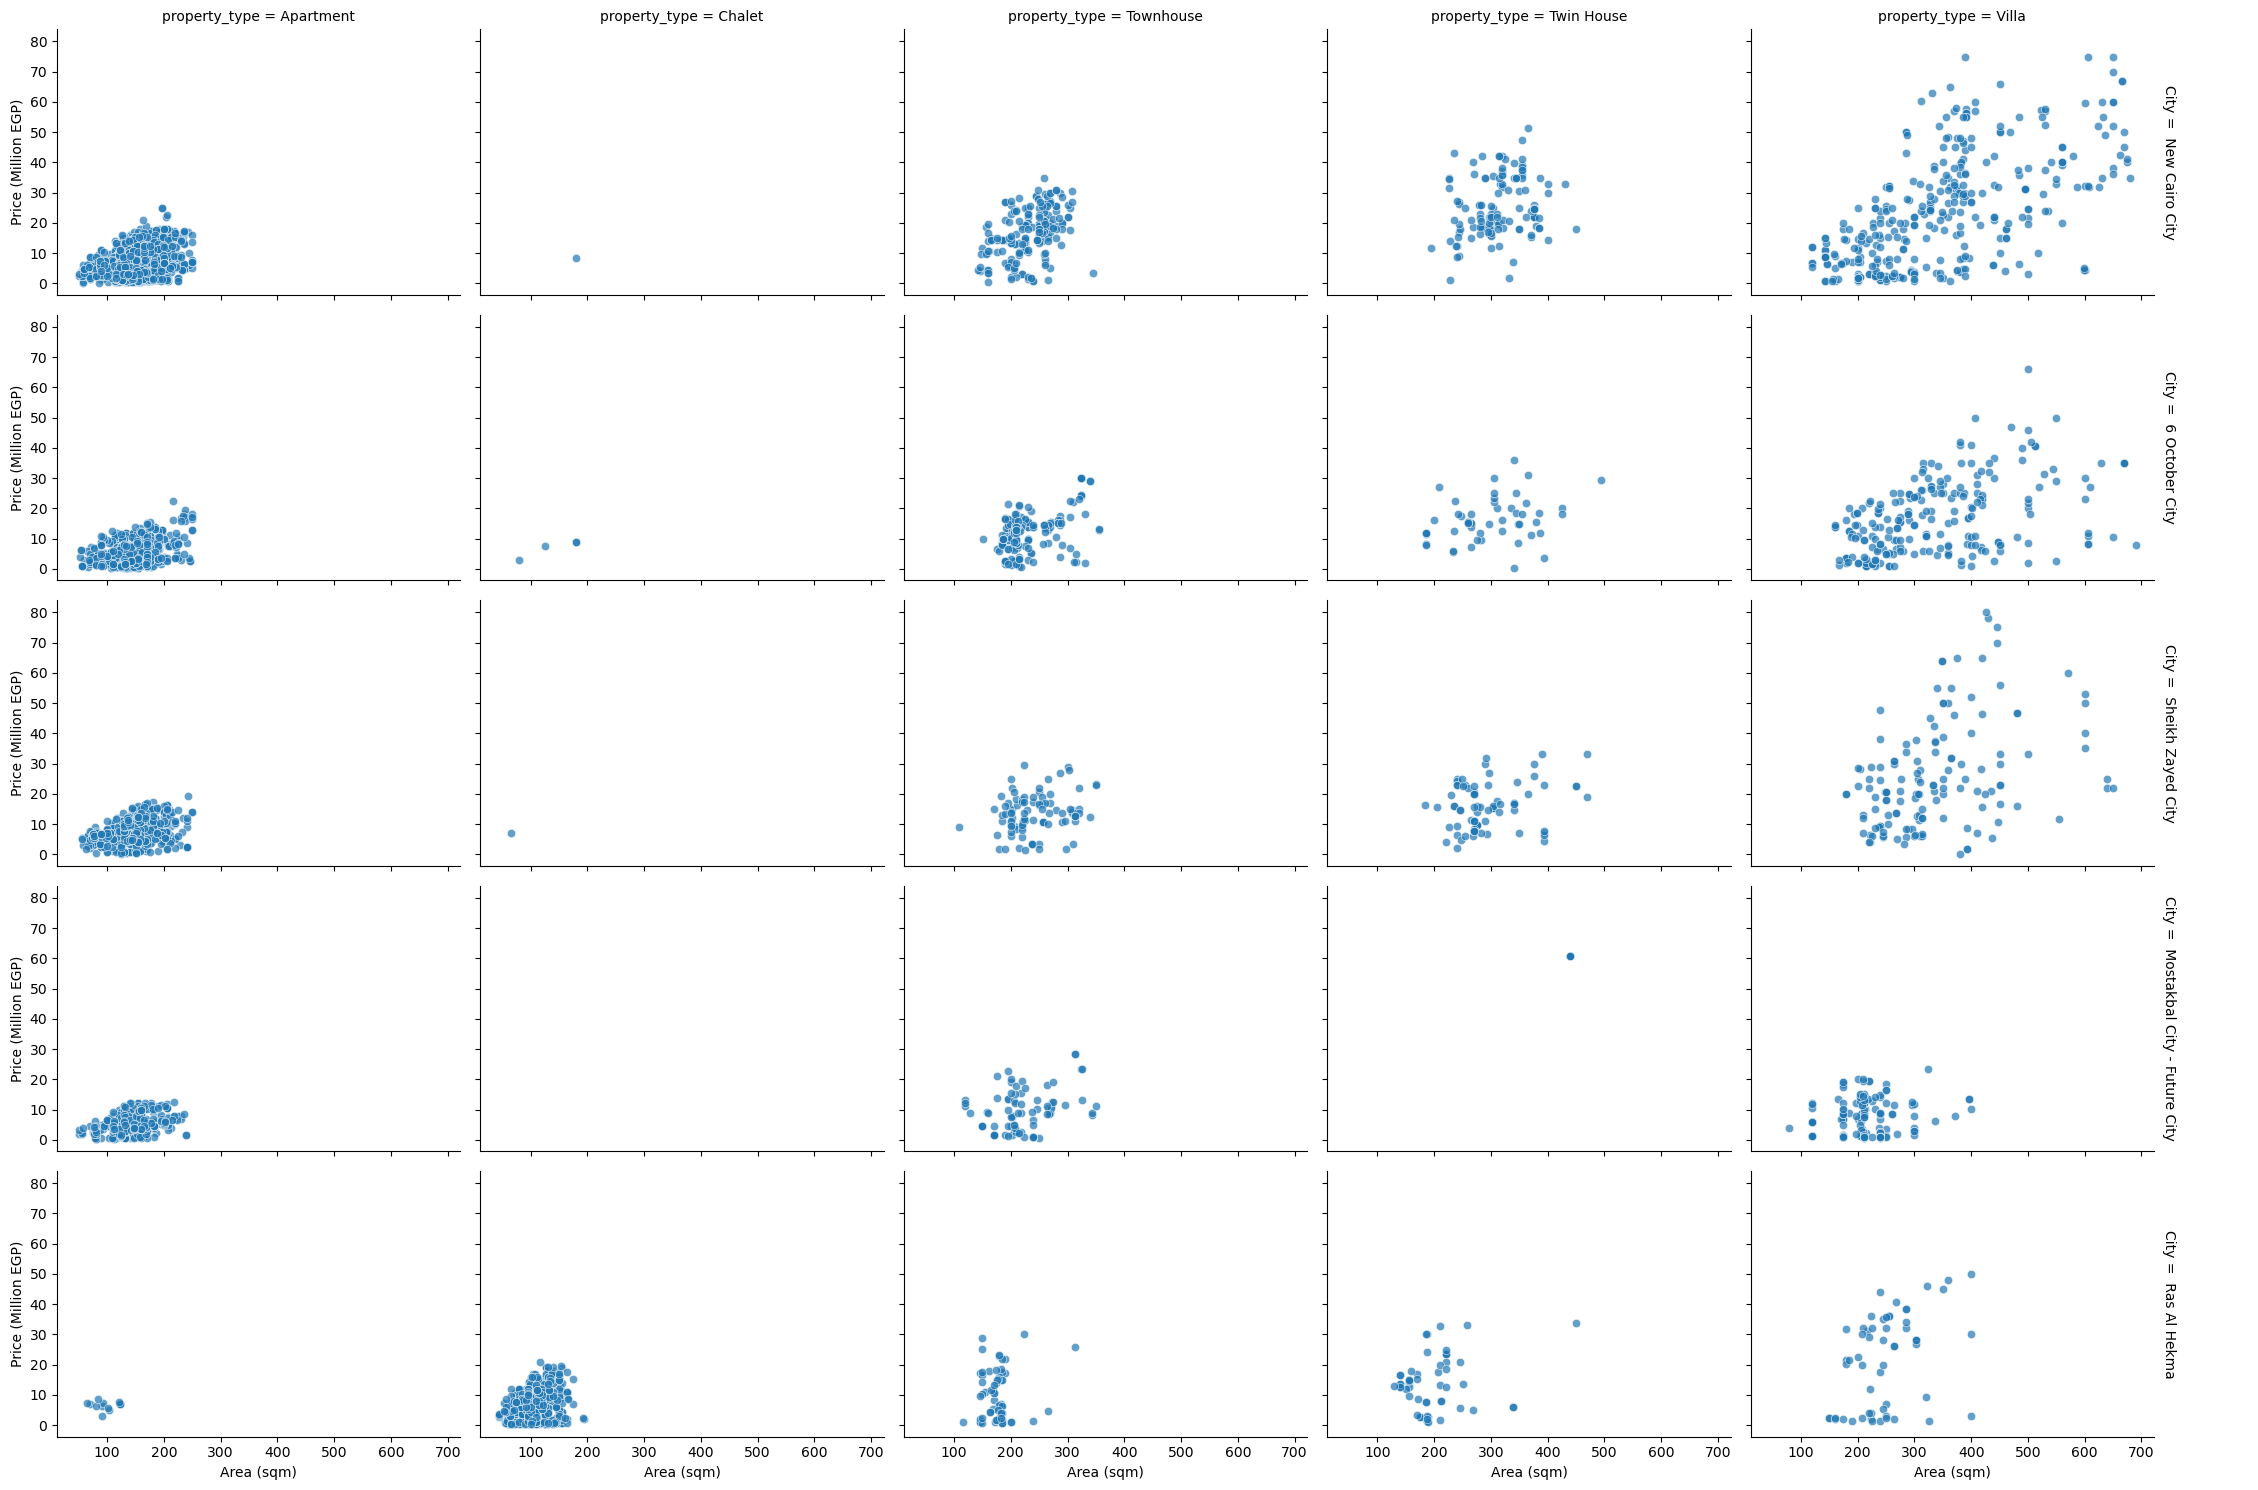

In [568]:
# Filter to the top 5 cities, top 5 property types, for visualization
top_cities = data_cleaned['City'].value_counts().nlargest(5).index
top_property_types = data_cleaned['property_type'].value_counts().nlargest(5).index

filtered_data = data_cleaned[
    data_cleaned['City'].isin(top_cities) & 
    data_cleaned['property_type'].isin(top_property_types) 
]

# Create the scatter plots for the filtered data
g = sns.FacetGrid(filtered_data, col="property_type", row="City", palette="tab10", margin_titles=True, height=3, aspect=1.5)
g.map(sns.scatterplot, "area", "price_in_million", alpha=.7)
g.add_legend()
g.set_axis_labels("Area (sqm)", "Price (Million EGP)")

plt.show()


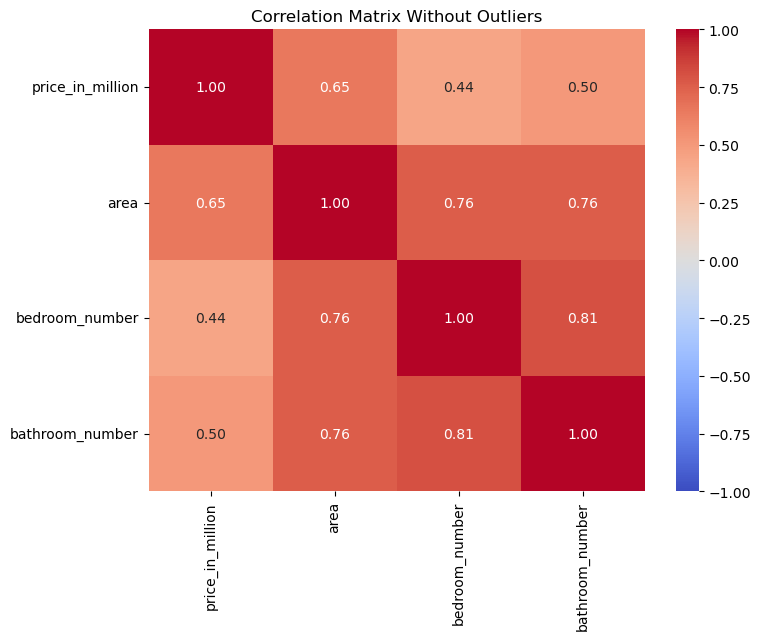

In [569]:
# Re-analyze correlations without outliers
correlation_matrix_no_outliers = data_cleaned[['price_in_million', 'area', 'bedroom_number', 'bathroom_number']].corr()

# Plot the updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_no_outliers, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Without Outliers')
plt.show()

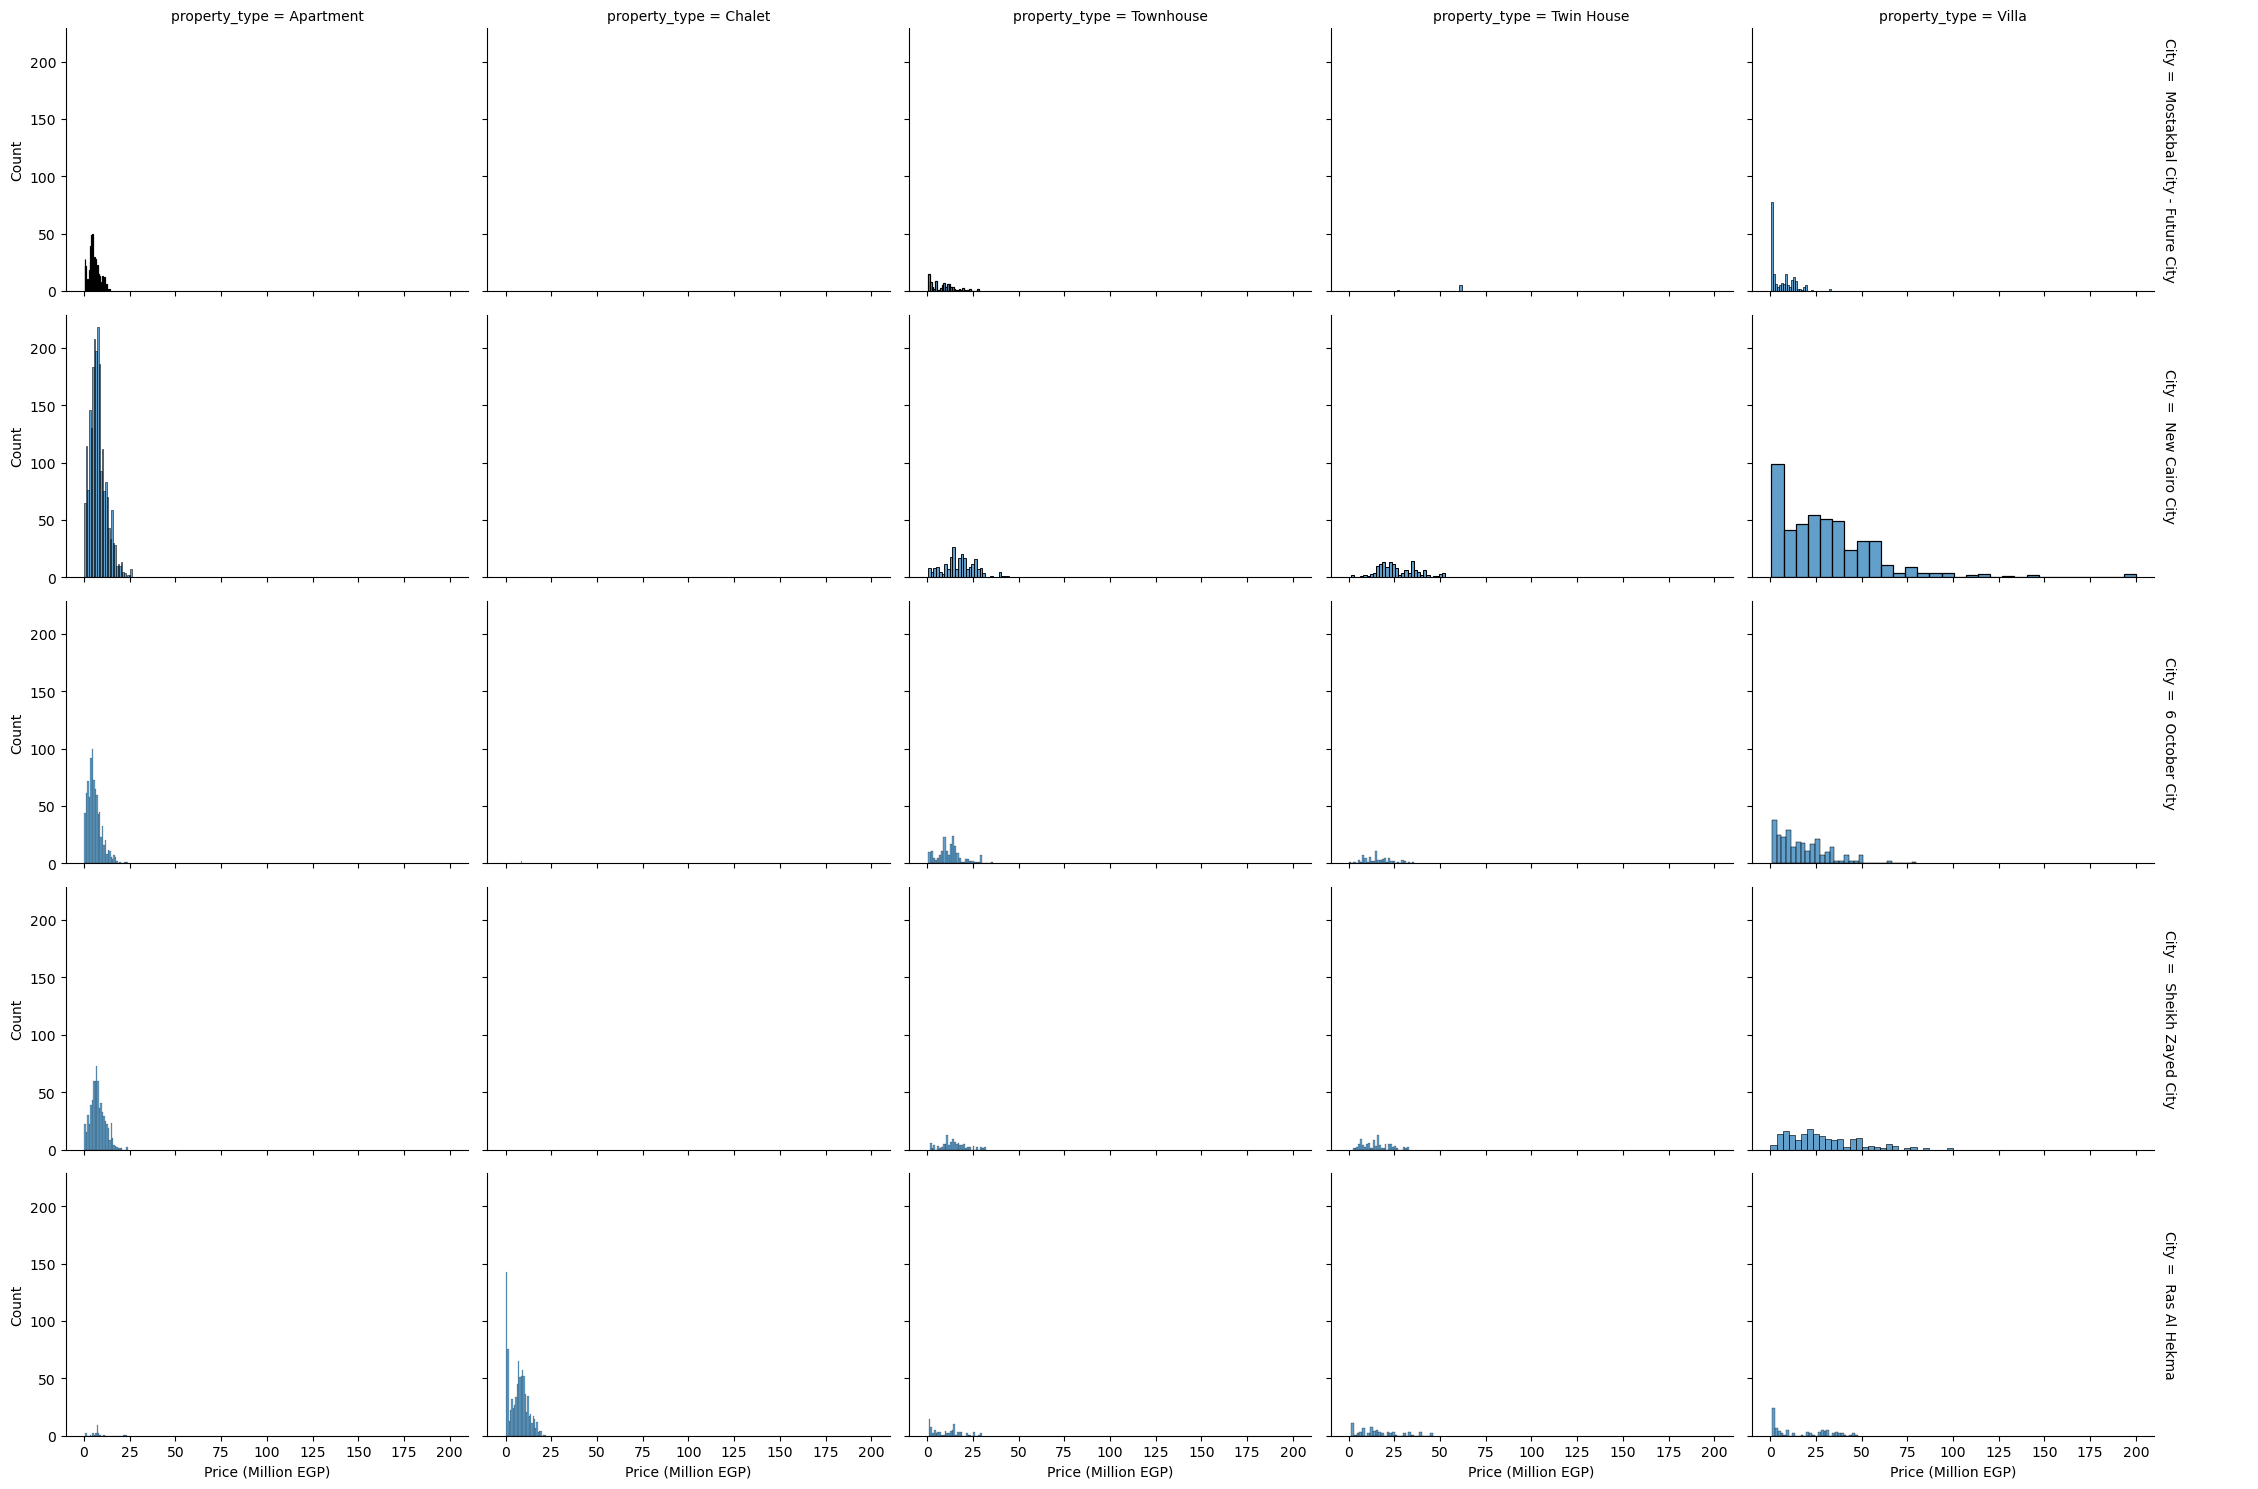

In [63]:

# Filter to the top 5 cities and top 5 property types for visualization
top_cities = data_cleaned['City'].value_counts().nlargest(5).index
top_property_types = data_cleaned['property_type'].value_counts().nlargest(5).index

filtered_data = data_cleaned[
    data_cleaned['City'].isin(top_cities) & 
    data_cleaned['property_type'].isin(top_property_types)
]

# Create the histograms for the filtered data
g = sns.FacetGrid(filtered_data, col="property_type", row="City", palette="tab10", margin_titles=True, height=3, aspect=1.5)
g.map(sns.histplot, "price_in_million", bins=30, alpha=.7)  # Use histplot for histogram
g.add_legend()
g.set_axis_labels("Price (Million EGP)", "Count")

plt.show()


In [570]:
# Calculate the average price for each combination of property type, governorate, and city
average_price_by_location = data_cleaned.groupby(['property_type', 'governorate', 'City'])['price_in_million'].mean().reset_index()

# Rename columns for clarity
average_price_by_location.columns = ['property_type', 'governorate', 'City', 'average_price']

# Display the results
average_price_by_location


property_type   governorate                           City  average_price
0       Apartment         Cairo                      Badr City       1.295797
1       Apartment         Cairo                   Hay El Maadi       4.180834
2       Apartment         Cairo   Mostakbal City - Future City       5.255600
3       Apartment         Cairo                 New Cairo City       7.318290
4       Apartment         Cairo               New Capital City       4.514951
..            ...           ...                            ...            ...
101         Villa   North Coast                   Ras Al Hekma      21.598888
102         Villa   North Coast              Sidi Abdel Rahman      46.159451
103         Villa   North Coast            North Coast Resorts       6.166667
104         Villa       Red Sea                       Hurghada      19.000000
105         Villa          Suez               Al Ain Al Sokhna       9.403904

[106 rows x 4 columns]

In [571]:
average_price_by_location['average_price'].min()

1.2957971014492753

In [572]:
# Calculate the average price for each property type
average_price_by_p = data_cleaned.groupby(['property_type'])['price_in_million'].mean().reset_index()

# Rename columns for clarity
average_price_by_p.columns = ['property_type', 'average_price']

# Display the results
average_price_by_p

property_type  average_price
0     Apartment       6.417867
1        Chalet       7.857873
2        Duplex      10.161666
3     Penthouse      10.741843
4     Townhouse      13.835852
5    Twin House      20.899236
6         Villa      21.629756

In [573]:
# Define the list of property types for which we want to filter out the rows
property_types_to_filter = ['villa', 'Twin House', 'Townhouse', 'Penthouse', 'Duplex']

# Filter out rows where price_in_million is less than 3 million for the specified property types
data_cleaned = data_cleaned[~((data_cleaned['property_type'].isin(property_types_to_filter)) & (data_cleaned['price_in_million'] < 3))]

# Optional: Verify the removal
data_cleaned.head()


property_type                                            address  \
0     Apartment  Mountain View iCity, 5th Settlement Compounds,...   
1     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   
2     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   
3     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   
4     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   

   bedroom_number  bathroom_number  area  \
0               3                3   210   
1               3                2   165   
2               2                1   135   
3               2                1   140   
4               3                2   170   

                                     description  \
0     Ready to move Semi Finished prime location   
1  Distinctive apartment in the Fifth Settlement   
2  Distinctive apartment in the Fifth Settlement   
3  Distinctive apartment in the Fifth Settlement   
4  Distinctive apartment in the Fifth Settlement   

                                                link  \
0  https://www.propertyfinder.eg/en/plp/buy/apart...   
1  https://www.propertyfinder.eg/en/plp/buy/apart...   
2  https://www.propertyfinder.eg/en/plp/buy/apart...   
3  https://www.propertyfinder.eg/en/plp/buy/apart...   
4  https://www.propertyfinder.eg/en/plp/buy/apart...   

                                               titil  price_in_million  \
0  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...             8.600   
1  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...             8.415   
2  Apartment - 2 Bedrooms - 1 Bathroom for sale i...             6.885   
3  Apartment - 2 Bedrooms - 1 Bathroom for sale i...             7.140   
4  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...             8.670   

  governorate             City             location  \
0       Cairo   New Cairo City   The 5th Settlement   
1       Cairo   New Cairo City   The 5th Settlement   
2       Cairo   New Cairo City   The 5th Settlement   
3       Cairo   New Cairo City   The 5th Settlement   
4       Cairo   New Cairo City   The 5th Settlement   

                address_only  price_of_squre_meter_in_million  
0   5th Settlement Compounds                         0.040952  
1   5th Settlement Compounds                         0.051000  
2   5th Settlement Compounds                         0.051000  
3   5th Settlement Compounds                         0.051000  
4   5th Settlement Compounds                         0.051000

In [574]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9248 entries, 0 to 9438
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    9248 non-null   object 
 1   address                          9248 non-null   object 
 2   bedroom_number                   9248 non-null   int32  
 3   bathroom_number                  9248 non-null   int32  
 4   area                             9248 non-null   int32  
 5   description                      9248 non-null   object 
 6   link                             9248 non-null   object 
 7   titil                            9248 non-null   object 
 8   price_in_million                 9248 non-null   float64
 9   governorate                      9248 non-null   object 
 10  City                             9248 non-null   object 
 11  location                         9248 non-null   object 
 12  address_only        

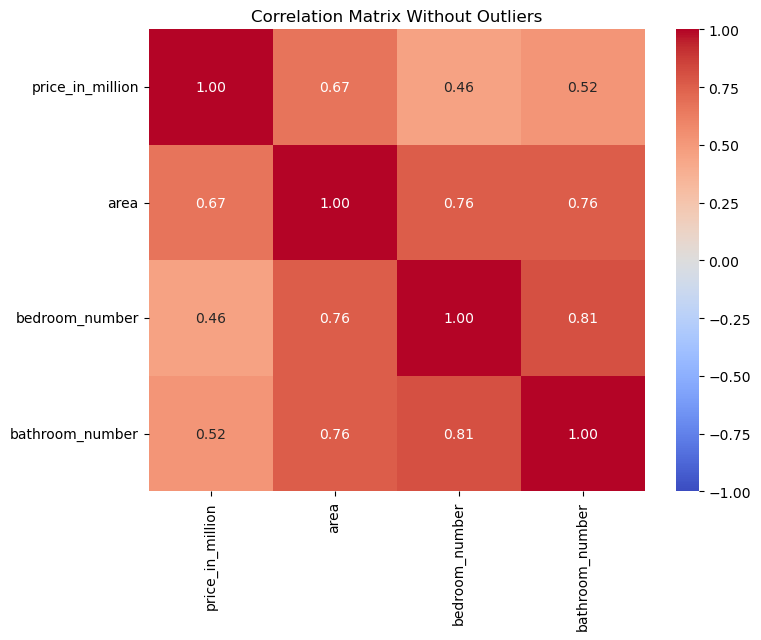

In [575]:
# Re-analyze correlations without outliers
correlation_matrix_no_outliers = data_cleaned[['price_in_million', 'area', 'bedroom_number', 'bathroom_number']].corr()

# Plot the updated correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_no_outliers, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Without Outliers')
plt.show()

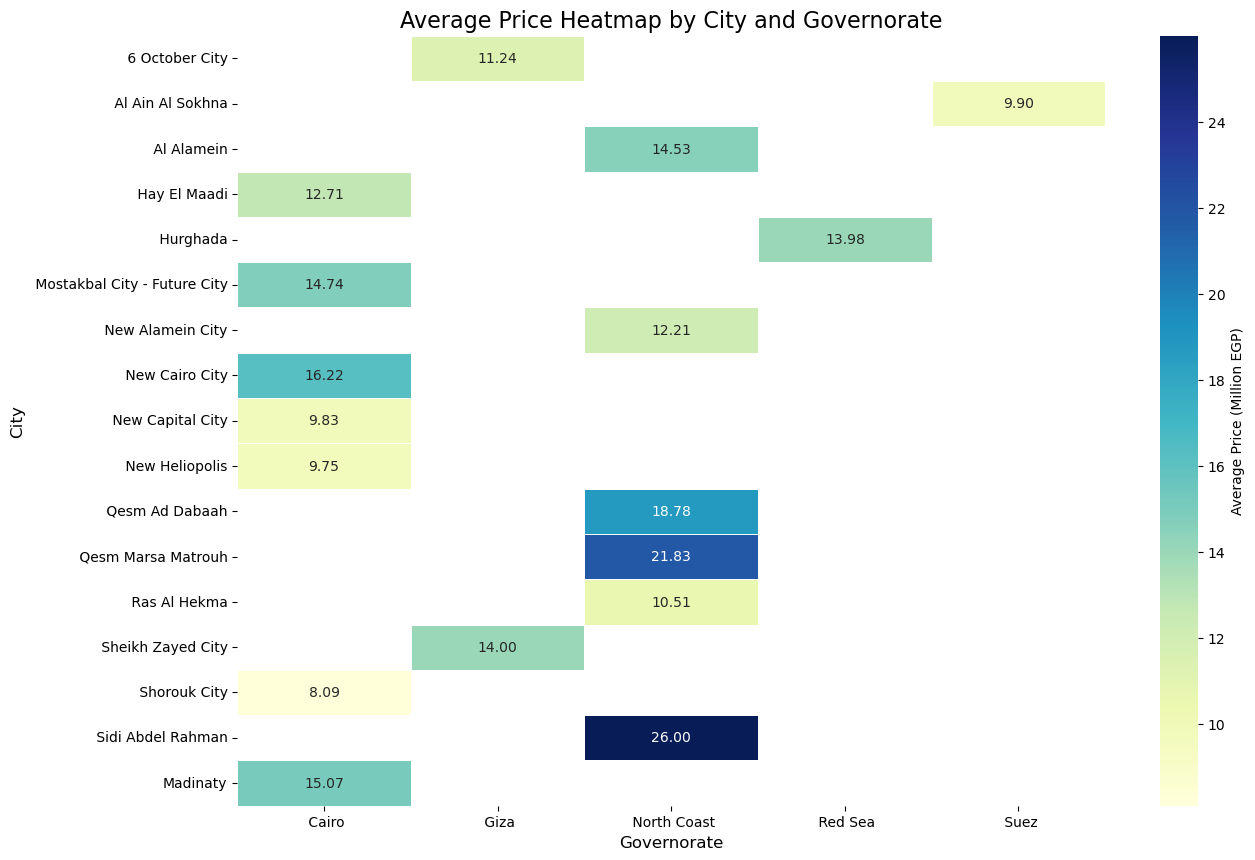

In [95]:
# Pivot the data for heatmap visualization
pivot_table = average_price_by_location.pivot_table(
    index='City', 
    columns='governorate', 
    values='average_price',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Average Price (Million EGP)'})
heatmap.set_title('Average Price Heatmap by City and Governorate', size=16)
heatmap.set_xlabel('Governorate', size=12)
heatmap.set_ylabel('City', size=12)

plt.show()


In [96]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11535 entries, 0 to 11744
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    11535 non-null  object 
 1   address                          11535 non-null  object 
 2   bedroom_number                   11535 non-null  int32  
 3   bathroom_number                  11535 non-null  int32  
 4   area                             11535 non-null  int32  
 5   description                      11535 non-null  object 
 6   link                             11535 non-null  object 
 7   titil                            11535 non-null  object 
 8   price_in_million                 11535 non-null  float64
 9   governorate                      11535 non-null  object 
 10  City                             11535 non-null  object 
 11  address_only                     11535 non-null  object 
 12  location          

In [576]:
# There are outliers values in the price, that came from the Inconsistency in the types of property
px.box(data_cleaned, x='price_in_million')

In [98]:
# the figure below show how the Inconsistency of the property price , 
# price of villa and apartment is too hight and the price of hotel apartment and roof is to low ,
# that came from the area of this property
px.histogram(data_cleaned,x='price_in_million',y='property_type')

In [577]:
px.histogram(data_cleaned,x='price_in_million')

In [100]:
Is there a correlation between the governorate of property and the price of meter


SyntaxError: invalid syntax (4112506840.py, line 1)

In [473]:
data_cleaned['City'].unique()

array([' New Cairo City', ' 6 October City', ' New Heliopolis',
       ' Sheikh Zayed City', ' Al Ain Al Sokhna', ' Al Alamein',
       ' Badr City', 'Madinaty', ' Shorouk City', ' Hurghada',
       ' Mostakbal City - Future City', ' New Alamein City',
       ' New Capital City', 'North Coast Resorts', ' Qesm Marsa Matrouh',
       ' Ras Al Hekma', ' Sidi Abdel Rahman', ' Hay El Maadi',
       ' Qesm Ad Dabaah'], dtype=object)

In [474]:
data_cleaned['location'].unique()

array([' The 5th Settlement', ' 6 October Compounds', ' 6th District',
       'Telal Al Sokhna', 'Golf Porto Marina', ' Al Andalus District',
       ' Al Wahat Road', 'El Motamayez District', 'Madinaty',
       ' Cairo Alexandria Desert Road', ' El Katameya',
       ' El Shorouk Compounds', ' Fayoum Desert road',
       'Al Ahyaa District', ' Marina', ' Mostakbal City Compounds',
       'Latin District', 'Mazarine', ' New Capital Compounds',
       ' New Zayed City', 'North Coast Resorts', ' North Investors Area',
       ' Northern Expansions', 'Silver Sands', 'Fouka Bay',
       'Mountain View', 'Hacienda West', 'Gaia', 'Koun', 'Seashore',
       ' Sheikh Zayed Compounds', 'Marassi', 'Hacienda Bay', 'Amwaj',
       ' South Dahshur Link', ' South Investors Area',
       ' The 1st Settlement', ' Zahraa El Maadi', 'IL Monte Galala',
       ' La Vista', 'Soul North Coast', 'Salt', 'Sea View', 'Solare',
       'June', 'Cali Coast', 'Azha North', 'La vista Ras El Hikma',
       'Seashell', 

In [475]:
data_cleaned['address_only'].unique()

array([' 5th Settlement Compounds', ' 6 October Compounds',
       ' 6th District', ' 90 Street', ' Al Ain Al Sokhna', ' Al Alamein',
       ' Al Andalus District', ' Al Wahat Road', ' Badr City', ' Cairo',
       ' Cairo Alexandria Desert Road', ' El Katameya Compounds',
       ' El Shorouk Compounds', ' Fayoum Desert road', ' Fifth Square',
       ' Hurghada', ' Marina', ' Mostakbal City Compounds',
       ' New Alamein City', ' New Capital Compounds', ' New Zayed City',
       ' North Coast', ' North Investors Area', ' Northern Expansions',
       ' Qesm Marsa Matrouh', ' Ras Al Hekma', ' Sheikh Zayed Compounds',
       ' Sidi Abdel Rahman', ' South Dahshur Link',
       ' South Investors Area', ' The 1st Settlement',
       ' The 5th Settlement', ' Zahraa El Maadi', ' Zed Towers',
       ' La Vista', ' Qesm Ad Dabaah'], dtype=object)

In [61]:
px.bar(data_cleaned,"governorate")

In [62]:
px.histogram(data_cleaned,x='price_in_million',y='governorate')


In [63]:
px.histogram(data_cleaned,x='price_in_million',y='property_type')


In [476]:
data_cleaned['property_type'].unique()


array(['Apartment', 'Chalet', 'Duplex', 'Penthouse', 'Townhouse',
       'Twin House', 'Villa'], dtype=object)

In [65]:
px.bar(data_cleaned,'property_type')

In [105]:
px.scatter(data_cleaned, x='property_type', y='price_in_million',color='governorate')

<Axes: xlabel='bedroom_number', ylabel='price_in_million'>

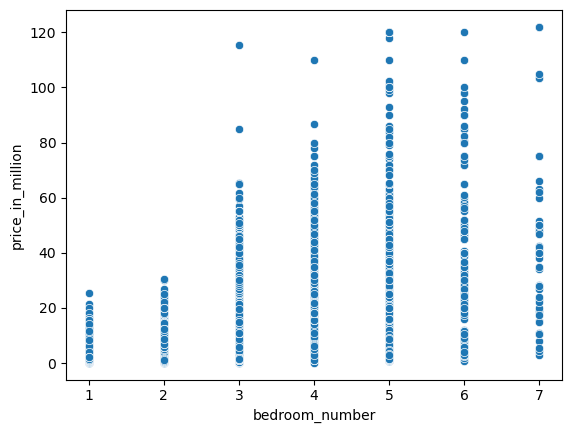

In [67]:
sns.scatterplot(data_cleaned, x='bedroom_number', y='price_in_million')

In [68]:
data_cleaned['area'].unique()

array([ 185,  100,  120,  111,  140,  200,  147,  175,  112,  225,  242,
        180,   96,  276,  210,  223,  174,  115,  320,  118,  202,   95,
        155,   70,  270,  360,  300,  177,  135,  250,  145,  114,  165,
        150,  170,  157,  315,  160,  196,   87,  220,  290,  190,  260,
         90,  218,   88,  280,  272,  130,  195,  205,  154,  121,  230,
        168,  191,  125,  275,  239,  153,  110,  184,  179,  245,  158,
        236,   63,   40,   45,  211,   60,  164,  116,  151,  133,  137,
        138,  176,  142,  183,  159,  178,  141,  152,  129,  201,  215,
         50,  126,  105,  136,  219,  254,  197,  194,  162,  204,  172,
        131,  106,  134,  163,  124,  132,  128,  186,   78,  161,   80,
        182,   86,  144,   81,  113,  208,  156,  139,  108,  104,   93,
        238,  207,  148,  101,   79,   75,  171,  167,  198,   56,  212,
        169,  187,  181,  166,  143,   76,  217,  103,  127,  122,  109,
        146,   57,  235,  214,  199,  226,   58,   

In [477]:
px.scatter(data_cleaned, x='area', y='price_in_million')

<Axes: xlabel='area', ylabel='price_in_million'>

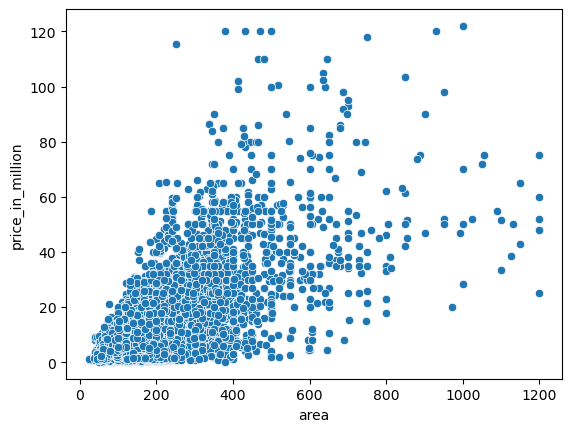

In [70]:
sns.scatterplot(data_cleaned, x='area', y='price_in_million')

<Axes: xlabel='bedroom_number', ylabel='price_in_million'>

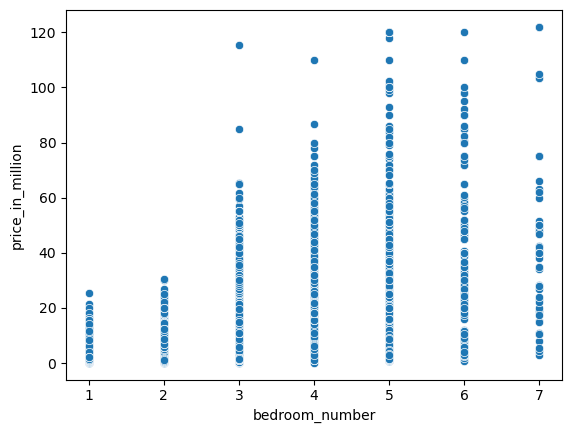

In [71]:
sns.scatterplot(data_cleaned, x='bedroom_number', y='price_in_million')

<Axes: xlabel='bathroom_number', ylabel='price_in_million'>

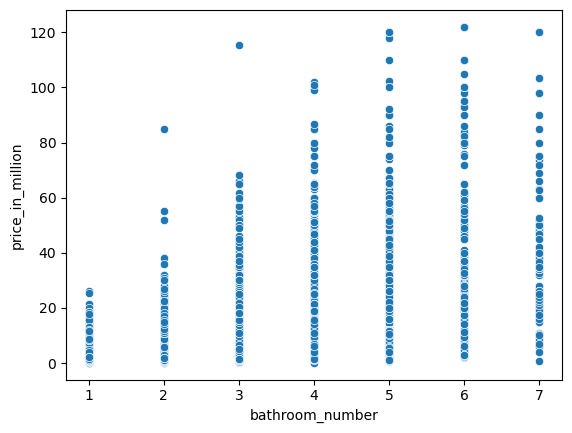

In [72]:
sns.scatterplot(data_cleaned, x='bathroom_number', y='price_in_million')

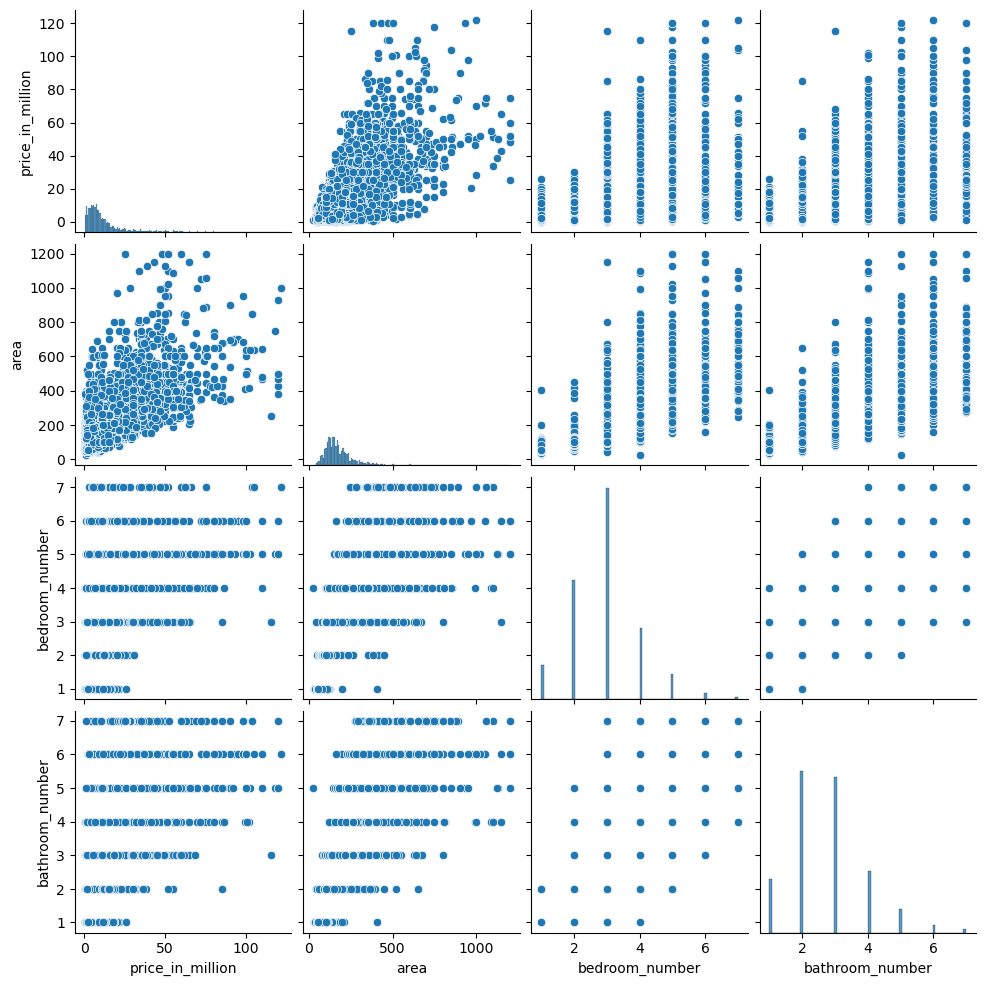

In [73]:
# Visualize relationships
sns.pairplot(data_cleaned[['price_in_million', 'area', 'bedroom_number', 'bathroom_number']])
plt.show()

In [74]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12322 entries, 0 to 12543
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    12322 non-null  object 
 1   address                          12322 non-null  object 
 2   bedroom_number                   12322 non-null  int32  
 3   bathroom_number                  12322 non-null  int32  
 4   area                             12322 non-null  int32  
 5   description                      12322 non-null  object 
 6   link                             12322 non-null  object 
 7   titil                            12322 non-null  object 
 8   price_in_million                 12322 non-null  float64
 9   governorate                      12322 non-null  object 
 10  City                             12322 non-null  object 
 11  address_only                     12322 non-null  object 
 12  price_of_squre_met

Which governorate is the most expensive in housing price?


In [75]:
average_price_by_governorate = data_cleaned.groupby('governorate')['price_in_million'].mean()
most_expensive_city = average_price_by_governorate.idxmax()  # Get the index (governorate name) with the maximum average price
print(f"The most expensive city in terms of housing price is: {most_expensive_city}")

The most expensive city in terms of housing price is:  North Coast


In [76]:
average_price_by_city_p = data_cleaned.groupby('governorate')['price_in_million'].mean()
# Sort the cities based on average price in descending order
sorted_cities_p = average_price_by_city_p.sort_values(ascending=False)
print("Cities ordered by average housing price:")
print(sorted_cities_p)

Cities ordered by average housing price:
governorate
 North Coast    13.129691
 Cairo          10.864350
 Giza           10.518993
 Suez            6.549840
 Red Sea         6.251300
 Alexandria      5.595232
Name: price_in_million, dtype: float64


In [77]:
average_price_by_city = data_cleaned.groupby('governorate')['price_in_million'].mean()
# Sort the cities based on average price in descending order
sorted_cities = average_price_by_city.sort_values(ascending=False)
print("Cities ordered by average housing price:")
print(sorted_cities)

Cities ordered by average housing price:
governorate
 North Coast    13.129691
 Cairo          10.864350
 Giza           10.518993
 Suez            6.549840
 Red Sea         6.251300
 Alexandria      5.595232
Name: price_in_million, dtype: float64


In [78]:
price_range_by_governorate = data_cleaned.groupby('governorate')['price_in_million'].agg(['min', 'max'])
print("Price range for each governorate:")
print(price_range_by_governorate)

Price range for each governorate:
                min      max
governorate                 
 Alexandria   1.400   28.680
 Cairo        0.100  122.000
 Giza         0.185   85.000
 North Coast  0.116  120.000
 Red Sea      0.825   43.775
 Suez         0.350   35.000


In [79]:
average_price_by_governorate = data_cleaned.groupby('governorate')['price_in_million'].mean().reset_index()

fig = px.bar(average_price_by_governorate, x='governorate', y='price_in_million', 
             title='Average Price by Governorate')

fig.show()


In [80]:
price_range_by_city = data_cleaned.groupby('City')['price_in_million'].agg(['min', 'max'])
print("Price range for each City:")
print(price_range_by_city)

Price range for each City:
                                  min         max
City                                             
 6 October City                0.2700   50.000000
 Al Ain Al Sokhna              0.3500   35.000000
 Al Alamein                    0.1160   52.000000
 Hay El Maadi                  0.6192   40.000000
 Hay Sharq                     1.4000   28.680000
 Hurghada                      0.8250   43.775000
 Mokattam                      1.5525   80.000000
 Mostakbal City - Future City  0.3000   61.786029
 New Alamein City              0.2350   56.234458
 New Cairo City                0.1000  122.000000
 New Capital City              0.2605   37.960000
 New Heliopolis                0.5650   35.000000
 Qesm Ad Dabaah                0.5500  102.148041
 Qesm Marsa Matrouh            0.5120  120.000000
 Ras Al Hekma                  0.2880   50.000000
 Sheikh Zayed City             0.1850   85.000000
 Shorouk City                  0.2660   34.000000
 Sidi Abdel Rahman     

Which property type is most expensive ?


In [81]:
average_price_by_property_type = data_cleaned.groupby('property_type')['price_in_million'].mean()
most_expensive_property_type = average_price_by_property_type.idxmax()  # Get the index (property type) with the maximum average price
print(f"The most expensive property type is: {most_expensive_property_type}")

The most expensive property type is: Villa


In [82]:
average_price_by_property_type1 = data_cleaned.groupby('property_type')['price_in_million'].mean()
# Sort the property types based on average price in descending order
sorted_property_types = average_price_by_property_type1.sort_values(ascending=False)
print("Property types ordered by average housing price:")
print(sorted_property_types)

Property types ordered by average housing price:
property_type
Villa         24.232617
Twin House    22.290737
Townhouse     16.163265
Penthouse     11.615889
Duplex        11.563511
Chalet         7.793012
Apartment      6.446246
Name: price_in_million, dtype: float64


In [83]:
average_price_by_property_type = data_cleaned.groupby('property_type')['price_in_million'].mean()
# Sort the property types based on average price in descending order
sorted_property_types = average_price_by_property_type.sort_values(ascending=False)
print("Property types ordered by average housing price:")
print(sorted_property_types)

Property types ordered by average housing price:
property_type
Villa         24.232617
Twin House    22.290737
Townhouse     16.163265
Penthouse     11.615889
Duplex        11.563511
Chalet         7.793012
Apartment      6.446246
Name: price_in_million, dtype: float64


In [84]:
average_price_by_property_type = data_cleaned.groupby('property_type')['price_in_million'].mean().reset_index()
fig = px.bar(average_price_by_property_type, x='property_type', y='price_in_million', 
             title='Average Price by Property Type')
fig.show()

Average Price by Property Type:
 property_type
Villa         24.232617
Twin House    22.290737
Townhouse     16.163265
Penthouse     11.615889
Duplex        11.563511
Chalet         7.793012
Apartment      6.446246
Name: price_in_million, dtype: float64
Average Price by Governorate:
 governorate
 North Coast    13.129691
 Cairo          10.864350
 Giza           10.518993
 Suez            6.549840
 Red Sea         6.251300
 Alexandria      5.595232
Name: price_in_million, dtype: float64


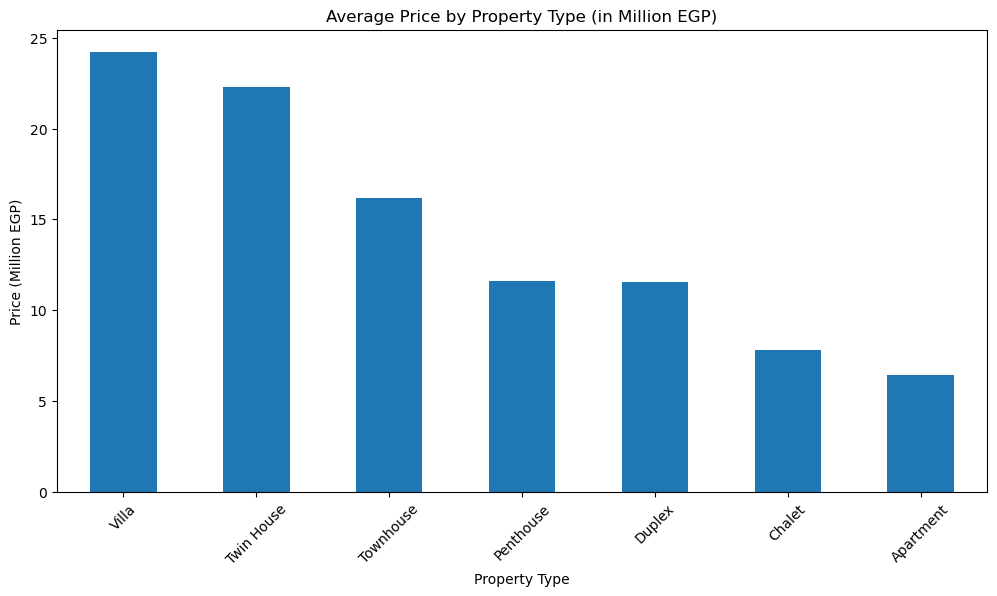

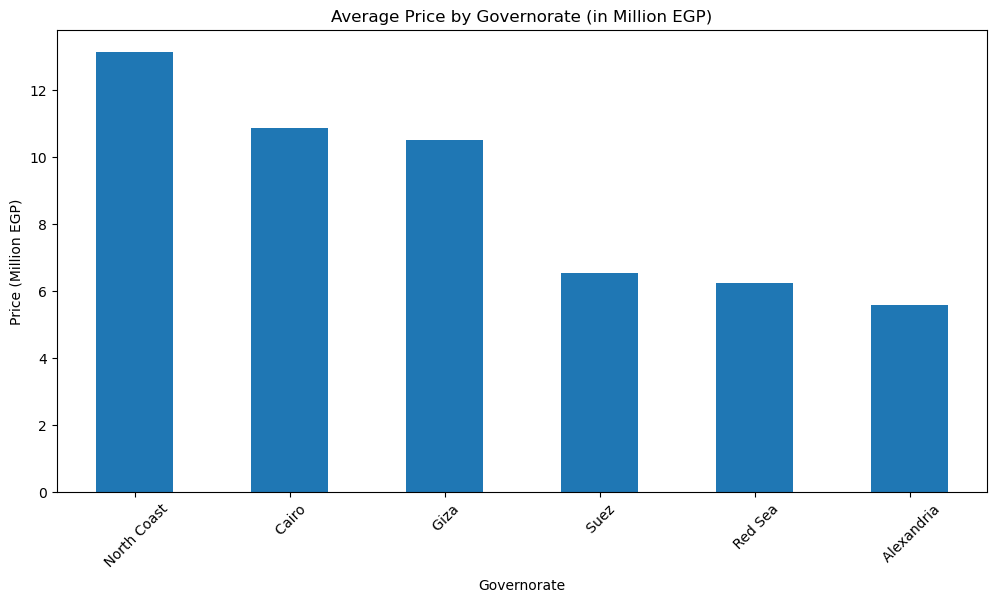

In [85]:
# Calculate the average price for each property type
avg_price_by_property_type = data_cleaned.groupby('property_type')['price_in_million'].mean().sort_values(ascending=False)
print("Average Price by Property Type:\n", avg_price_by_property_type)

# Calculate the average price for each governorate
avg_price_by_governorate = data_cleaned.groupby('governorate')['price_in_million'].mean().sort_values(ascending=False)
print("Average Price by Governorate:\n", avg_price_by_governorate)

# Visualize the average price by property type
plt.figure(figsize=(12, 6))
avg_price_by_property_type.plot(kind='bar')
plt.title('Average Price by Property Type (in Million EGP)')
plt.ylabel('Price (Million EGP)')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.show()

# Visualize the average price by governorate
plt.figure(figsize=(12, 6))
avg_price_by_governorate.plot(kind='bar')
plt.title('Average Price by Governorate (in Million EGP)')
plt.ylabel('Price (Million EGP)')
plt.xlabel('Governorate')
plt.xticks(rotation=45)
plt.show()


In [478]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9623 entries, 0 to 9827
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   property_type                    9623 non-null   object 
 1   address                          9623 non-null   object 
 2   bedroom_number                   9623 non-null   int32  
 3   bathroom_number                  9623 non-null   int32  
 4   area                             9623 non-null   int32  
 5   description                      9623 non-null   object 
 6   link                             9623 non-null   object 
 7   titil                            9623 non-null   object 
 8   price_in_million                 9623 non-null   float64
 9   governorate                      9623 non-null   object 
 10  City                             9623 non-null   object 
 11  location                         9623 non-null   object 
 12  address_only        

In [578]:
# Remove leading and trailing spaces
data_cleaned['property_type'] = data_cleaned['property_type'].str.strip()
data_cleaned['governorate'] = data_cleaned['governorate'].str.strip()
data_cleaned['City'] = data_cleaned['City'].str.strip()
data_cleaned['location'] = data_cleaned['location'].str.strip()
data_cleaned['address_only'] = data_cleaned['address_only'].str.strip()


# Optional: Verify the changes
data_cleaned.head()


property_type                                            address  \
0     Apartment  Mountain View iCity, 5th Settlement Compounds,...   
1     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   
2     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   
3     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   
4     Apartment  Nest Cairo, 5th Settlement Compounds, The 5th ...   

   bedroom_number  bathroom_number  area  \
0               3                3   210   
1               3                2   165   
2               2                1   135   
3               2                1   140   
4               3                2   170   

                                     description  \
0     Ready to move Semi Finished prime location   
1  Distinctive apartment in the Fifth Settlement   
2  Distinctive apartment in the Fifth Settlement   
3  Distinctive apartment in the Fifth Settlement   
4  Distinctive apartment in the Fifth Settlement   

                                                link  \
0  https://www.propertyfinder.eg/en/plp/buy/apart...   
1  https://www.propertyfinder.eg/en/plp/buy/apart...   
2  https://www.propertyfinder.eg/en/plp/buy/apart...   
3  https://www.propertyfinder.eg/en/plp/buy/apart...   
4  https://www.propertyfinder.eg/en/plp/buy/apart...   

                                               titil  price_in_million  \
0  Apartment - 3 Bedrooms - 3 Bathrooms for sale ...             8.600   
1  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...             8.415   
2  Apartment - 2 Bedrooms - 1 Bathroom for sale i...             6.885   
3  Apartment - 2 Bedrooms - 1 Bathroom for sale i...             7.140   
4  Apartment - 3 Bedrooms - 2 Bathrooms for sale ...             8.670   

  governorate            City            location              address_only  \
0       Cairo  New Cairo City  The 5th Settlement  5th Settlement Compounds   
1       Cairo  New Cairo City  The 5th Settlement  5th Settlement Compounds   
2       Cairo  New Cairo City  The 5th Settlement  5th Settlement Compounds   
3       Cairo  New Cairo City  The 5th Settlement  5th Settlement Compounds   
4       Cairo  New Cairo City  The 5th Settlement  5th Settlement Compounds   

   price_of_squre_meter_in_million  
0                         0.040952  
1                         0.051000  
2                         0.051000  
3                         0.051000  
4                         0.051000

In [580]:
data_cleaned.to_csv('data_cleaned_new.csv')

##  Modeling 

In [480]:
# Drop useless features

df5= data_cleaned.drop(columns=['address','description','link','titil','price_of_squre_meter_in_million'], axis=1)

In [481]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9623 entries, 0 to 9827
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     9623 non-null   object 
 1   bedroom_number    9623 non-null   int32  
 2   bathroom_number   9623 non-null   int32  
 3   area              9623 non-null   int32  
 4   price_in_million  9623 non-null   float64
 5   governorate       9623 non-null   object 
 6   City              9623 non-null   object 
 7   location          9623 non-null   object 
 8   address_only      9623 non-null   object 
dtypes: float64(1), int32(3), object(5)
memory usage: 639.0+ KB


In [581]:
# Apply the preprocessing to  dataset
X = df5.drop(columns=['price_in_million'])  
y = df5['price_in_million']  

In [582]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9623 entries, 0 to 9827
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_type    9623 non-null   object
 1   bedroom_number   9623 non-null   int32 
 2   bathroom_number  9623 non-null   int32 
 3   area             9623 non-null   int32 
 4   governorate      9623 non-null   object
 5   City             9623 non-null   object
 6   location         9623 non-null   object
 7   address_only     9623 non-null   object
dtypes: int32(3), object(5)
memory usage: 563.8+ KB


In [591]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [592]:
# Apply StandardScaler to the numerical features
scaler = StandardScaler()
X_train_num = X_train[['area','bedroom_number','bathroom_number']]
X_test_num = X_test[['area','bedroom_number','bathroom_number']]


In [593]:
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [594]:
# Convert the scaled arrays back to DataFrames ( for easier handling)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['area','bedroom_number','bathroom_number'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['area','bedroom_number','bathroom_number'])

In [595]:
# Select categorical columns for encoding
X_train_cat = X_train[['property_type','governorate', 'City','location','address_only']]
X_test_cat = X_test[['property_type','governorate','City','location','address_only']]

In [596]:
# Apply OneHotEncoder to the categorical features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

In [597]:

# Fit the encoder on the training data and transform both training and test data
X_train_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_encoded = encoder.transform(X_test_cat).toarray()

In [598]:
# Convert the encoded arrays back to DataFrames (optional, for easier handling)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['property_type','governorate','City','location','address_only']))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['property_type','governorate','City','location','address_only']))

In [599]:
# Combine the scaled numerical features with the encoded categorical features
X_train_final = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded], axis=1)

In [600]:
model = LinearRegression()
model.fit(X_train_final, y_train)

train_r2 = model.score(X_train_final, y_train)
test_r2  = model.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Training Accuracy: 0.6059745234132181
Testing Accuracy: 0.5820684230142057


In [601]:
# Train a Random Forest model on the prepared training data
model = RandomForestRegressor(random_state=42)
model.fit(X_train_final, y_train)

# Predict on the test data
y_pred = model.predict(X_test_final)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 44.33652741730068


In [602]:
XGB_model =XGBRegressor()
XGB_model.fit(X_train_final, y_train)
y_pred = XGB_model.predict(X_test_final)
y_pred = pd.DataFrame(y_pred)
MAE_XGB= metrics.mean_absolute_error(y_test, y_pred)
MSE_XGB = metrics.mean_squared_error(y_test, y_pred)
RMSE_XGB =np.sqrt(MSE_XGB)
pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB], index=['MAE_XGB', 'MSE_XGB', 'RMSE_XGB'], columns=['Metrics'])


Metrics
MAE_XGB    4.133750
MSE_XGB   46.400544
RMSE_XGB   6.811795

In [603]:
scores = cross_val_score(XGB_model, X_train_final, y_train, cv=5)
print(np.sqrt(scores))

[0.8287727  0.78152401 0.83051843 0.76815228 0.79418967]


In [604]:
r2_score(y_train, XGB_model.predict(X_train_final))

0.8486313662796786

In [605]:
r2_score(y_test, XGB_model.predict(X_test_final))

0.6262195631824679

In [606]:

model = Pipeline(steps=[
    
    ('regressor', xgb.XGBRegressor())
])

params = {
    'regressor__n_estimators': [70,100, 200],
    'regressor__learning_rate': [0.01, 0.1,0.13],
    'regressor__max_depth': [3, 5, 7]
}

grid = GridSearchCV(model, params, cv=7)
grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
train_r2 = grid.score(X_train_final, y_train)
test_r2  = grid.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Best Parameters: {'regressor__learning_rate': 0.13, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best Score: 0.6528728166391645
Training Accuracy: 0.7997983767324639
Testing Accuracy: 0.6453356748383761


In [607]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_final, y_train)

GradientBoostingRegressor()

In [608]:
y_pred = Gradient_model.predict(X_test_final)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

Metrics
MAE_gradient    4.432131
MSE_gradient   46.898809
RMSE_gradient   6.848271

In [609]:
scores = cross_val_score(Gradient_model, X_train_final, y_train, cv=5)
print(np.sqrt(scores))

[0.80789596 0.80536559 0.81253303 0.78699248 0.78523656]


In [610]:
r2_score(y_test, Gradient_model.predict(X_test_final))

0.6222057844258995

In [611]:

dt = DecisionTreeRegressor()

dt.fit(X_train_final, y_train)

train_r2 = dt.score(X_train_final, y_train)
test_r2  = dt.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Training Accuracy: 0.9470855406464822
Testing Accuracy: 0.5077186084005822


In [612]:
dt = DecisionTreeRegressor()


In [613]:
cv = cross_validate(dt, X_train_final, y_train, cv=10, return_train_score=True, scoring='r2', return_estimator=True)

In [614]:
index_max = cv['test_score'].argmax()
cv['estimator'][index_max]

DecisionTreeRegressor()

In [615]:
cv['estimator'][index_max].score(X_train_final, y_train)

0.9161459191802507

In [616]:
cv['estimator'][index_max].score(X_test_final, y_test)

0.4805868266945197

In [617]:
dt = DecisionTreeRegressor()

params = {
    'max_depth': [4, 6, 8,13,15],
    'min_samples_leaf': [200, 20000],
    'max_leaf_nodes': [10, 20],
    'criterion': ('squared_error', 'friedman_mse')
}

grid = GridSearchCV(dt, params)
grid.fit(X_train_final, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse'),
                         'max_depth': [4, 6, 8, 13, 15],
                         'max_leaf_nodes': [10, 20],
                         'min_samples_leaf': [200, 20000]})

In [618]:
grid.score(X_test_final, y_test)

0.4777727884871691

In [619]:
grid.score(X_train_final, y_train)

0.5171073328593685

In [121]:


# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize the RandomizedSearchCV with Random Forest
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=3,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train_final, y_train)

# Get the best parameters and evaluate the best model
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

# Predict on the test set using the best model
y_pred_best_rf = best_rf_model.predict(X_test_final)

# Evaluate the tuned Random Forest model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Parameters: {best_params}")
print(f" RMSE: {rmse_best_rf}, R²: {r2_best_rf}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Ahmed\anaconda3\lib\site-packages\s

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
 RMSE: 7.038363971321228, R²: 0.6715678128447321


In [620]:
# Lasso Regression
lasso = Lasso(alpha=0.000007)
lasso.fit(X_train_final, y_train)
lasso_train_pred = lasso.predict(X_train_final)
lasso_test_pred = lasso.predict(X_test_final)

print("\nLasso Regression:")
print(f"Training R² Score: {r2_score(y_train, lasso_train_pred):.4f}")
print(f"Testing R² Score: {r2_score(y_test, lasso_test_pred):.4f}")


Lasso Regression:
Training R² Score: 0.6066
Testing R² Score: 0.5818


c:\Users\Ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.701e+05, tolerance: 1.038e+02



In [621]:

model = Pipeline(steps=[
    
    ('regressor', xgb.XGBRegressor())
])

params = {
    'regressor__n_estimators': [50,100],
    'regressor__learning_rate': [0.001, 0.1],
    'regressor__max_depth': [3, 5, 7,10,13]
}

grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
train_r2 = grid.score(X_train_final, y_train)
test_r2  = grid.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 100}
Best Score: 0.6577310914580471
Training Accuracy: 0.8036746316995758
Testing Accuracy: 0.6400416712670651


In [511]:
initial_pca_components = 5
pca = PCA(n_components=initial_pca_components)
x_train_pca = pca.fit_transform(X_train_final)
x_test_pca = pca.transform(X_test_final)

In [512]:

model = Pipeline(steps=[
    
    ('regressor', xgb.XGBRegressor())
])

params = {
    'regressor__n_estimators': [100, 1000],
    'regressor__learning_rate': [0.001, 0.1],
    'regressor__max_depth': [3, 5, 7,10]
}

grid = GridSearchCV(model, params, cv=5)
grid.fit(x_train_pca, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
train_r2 = grid.score(x_train_pca, y_train)
test_r2  = grid.score(x_test_pca, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 100}
Best Score: 0.5630767370639542
Training Accuracy: 0.8651982072421622
Testing Accuracy: 0.5808942539631695


In [513]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train_final, y_train)


RandomForestRegressor(random_state=42)

In [514]:
y_pred = model.predict(X_test_final)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 3.927906955960107
R-squared: 0.6544295519187191


In [515]:
model.score(X_train_final, y_train), model.score(X_test_final, y_test)

(0.9169375054909307, 0.6544295519187191)

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[('regressor', DecisionTreeRegressor())])

params = {
    'regressor__max_depth': [5, 10, 15],         # Shallower depth
    'regressor__min_samples_leaf': [10, 20, 50],  # Minimum samples in leaves
    'regressor__min_samples_split': [5, 10, 20],  # Minimum samples to split nodes
    'regressor__criterion': ['squared_error', 'friedman_mse']
}

grid = GridSearchCV(model, params, cv=5)  # Using cross-validation
grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 15, 'regressor__min_samples_leaf': 20, 'regressor__min_samples_split': 5}
Best Score: 0.5480824062634154


In [152]:
y_train_pred = grid.predict(X_train_final)
y_test_pred = grid.predict(X_test_final)

# Print evaluation metrics
print(f"Training R² Score: {r2_score(y_train, y_train_pred)}")
print(f"Testing R² Score: {r2_score(y_test, y_test_pred)}")

print(f"Training MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Testing MSE: {mean_squared_error(y_test, y_test_pred)}")

Training R² Score: 0.6106023581832902
Testing R² Score: 0.5849983468695189
Training MSE: 63.53492718723215
Testing MSE: 77.82686572988696


In [516]:


# Define base models
base_models = [
    ('ridge', Ridge()),
    ('decision_tree', DecisionTreeRegressor()),
    ('random_forest', RandomForestRegressor())
]

# Define meta-model
meta_model = Ridge()

# Create stacking regressor
model = Pipeline(steps=[
    ('regressor', StackingRegressor(estimators=base_models, final_estimator=meta_model))
])

# Fit the model
model.fit(X_train_final, y_train)

# Evaluate the model
print("Training Score:", model.score(X_train_final, y_train))
print("Testing Score:", model.score(X_test_final, y_test))


Training Score: 0.847645974950375
Testing Score: 0.6796166508542336


In [322]:

model = Pipeline(steps=[
    
    ('regressor', xgb.XGBRegressor())
])

params = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5, 7]
}

grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train_final, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
train_r2 = grid.score(X_train_final, y_train)
test_r2  = grid.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best Score: 0.6429717332267286
Training Accuracy: 0.779289198547165
Testing Accuracy: 0.6885082890209299


In [323]:

dt.fit(X_train_final, y_train)

train_r2 = dt.score(X_train_final, y_train)
test_r2  = dt.score(X_test_final, y_test)
print(f"Training Accuracy: {train_r2}\nTesting Accuracy: {test_r2}")

Training Accuracy: 0.9434888187670083
Testing Accuracy: 0.5036432382573104


In [324]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_final, y_train)
ridge_train_pred = ridge.predict(X_train_final)
ridge_test_pred = ridge.predict(X_test_final)

print("Ridge Regression:")
print(f"Training R² Score: {r2_score(y_train, ridge_train_pred):.4f}")
print(f"Testing R² Score: {r2_score(y_test, ridge_test_pred):.4f}")

Ridge Regression:
Training R² Score: 0.5846
Testing R² Score: 0.6166


In [518]:

# Define a range of alpha values
alpha_values = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge with cross-validation
ridge_cv = GridSearchCV(Ridge(), alpha_values, cv=5)
ridge_cv.fit(X_train_final, y_train)
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Ridge CV Score: {ridge_cv.best_score_:.4f}")

# Lasso with cross-validation
lasso_cv = GridSearchCV(Lasso(), alpha_values, cv=5)
lasso_cv.fit(X_train_final, y_train)
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")
print(f"Best Lasso CV Score: {lasso_cv.best_score_:.4f}")

Best Ridge Alpha: 10
Best Ridge CV Score: 0.5893
Best Lasso Alpha: 0.01
Best Lasso CV Score: 0.5884


In [519]:
print("Training Score:", lasso_cv.score(X_train_final, y_train))
print("Testing Score:", lasso_cv.score(X_test_final, y_test))

Training Score: 0.5981705021301307
Testing Score: 0.6027589393566073


In [517]:
model = Pipeline(steps=[
    ('regressor', VotingRegressor(estimators=[
        ('ridge', Ridge()),
        ('decision_tree', DecisionTreeRegressor()),
        ('random_forest', RandomForestRegressor())
    ]))
])

model.fit(X_train_final, y_train)

print("Training Score:", model.score(X_train_final, y_train))
print("Testing Score:", model.score(X_test_final, y_test))

Training Score: 0.8920173403005751
Testing Score: 0.6607277259196997


pickle

In [362]:
import pickle

#  `model` is trained model
filename = 'model.pkl'

# Save the model to a file
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {filename}")


Model saved to model.pkl


In [364]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['encoder.pkl']

In [142]:
# Save the encoder object itself, not the transformed data
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [143]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [371]:
# Example new data
new_data = pd.DataFrame({
    'area': [600],
    'bedroom_number': [6],
    'bathroom_number': [3],
    'property_type': ['Villa'],
    'governorate': ['Cairo'],
    'City': ['New Cairo City']
})


In [372]:
# Encode categorical features
new_data_encoded = encoder.transform(new_data[['property_type', 'governorate', 'City']])

# Scale numerical features
new_data_scaled = scaler.transform(new_data[['area', 'bedroom_number', 'bathroom_number']])

# Combine the scaled numerical data with the encoded categorical data
combined_features = np.hstack((new_data_scaled, new_data_encoded.toarray()))

# Create a DataFrame for the combined features with the appropriate column names
feature_names = (list(X_train_final[['area', 'bedroom_number', 'bathroom_number']].columns) +
                 list(encoder.get_feature_names_out(['property_type', 'governorate', 'City'])))

new_data_prepared = pd.DataFrame(combined_features, columns=feature_names)


In [373]:
# Make a prediction with the trained model
prediction = model.predict(new_data_prepared)

# Output the prediction
print(f"The predicted price (in million) is: {prediction[0]}")

The predicted price (in million) is: 31.74593130894897
